In [28]:
from sklearn.linear_model import SGDRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn import svm

In [29]:
#Reading the dataset
data = pd.read_csv('C:/Trinity/Comp Sc/ML/Datasets/bank-additional/bank-additional-full.csv',sep=';')
data['id'] = data.index

In [30]:
#Creating a copy of the data
bank_data = data.copy()

In [31]:
bank_data_2 = bank_data.copy()

In [32]:
#Dropping rows with column > 25
bank_data_2 = bank_data_2.drop(bank_data_2[bank_data_2.campaign>25].index)

In [33]:
#Subsetting only the bank client data
bank_client_data=bank_data_2[['age','job','marital','education','default','housing','loan']].copy()

In [34]:
bank_client_data_2 = bank_client_data.copy()

In [35]:
label_mapping = {}
bank_client_data_2['job'], label_mapping['job'] = pd.factorize(bank_client_data_2['job'])
bank_client_data_2['marital'], label_mapping['marital'] = pd.factorize(bank_client_data_2['marital'])
bank_client_data_2['education'], label_mapping['education'] = pd.factorize(bank_client_data_2['education'])
bank_client_data_2['default'], label_mapping['default'] = pd.factorize(bank_client_data_2['default'])
bank_client_data_2['housing'], label_mapping['housing'] = pd.factorize(bank_client_data_2['housing'])
bank_client_data_2['loan'], label_mapping['loan'] = pd.factorize(bank_client_data_2['loan'])
print('label_mapping is  : ',label_mapping)

label_mapping is  :  {'job': Index(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'],
      dtype='object'), 'marital': Index(['married', 'single', 'divorced', 'unknown'], dtype='object'), 'education': Index(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree', 'illiterate'],
      dtype='object'), 'default': Index(['no', 'unknown', 'yes'], dtype='object'), 'housing': Index(['no', 'yes', 'unknown'], dtype='object'), 'loan': Index(['no', 'yes', 'unknown'], dtype='object')}


In [36]:
#Starting with imputation of 'Education'
bank_client_data_education=bank_client_data_2.copy()

In [37]:
np.unique(bank_client_data_education.job)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [38]:
len(bank_client_data_education[bank_client_data_education['education']==5])

1729

In [39]:
y = bank_client_data_education['education']
ytest=y[y==5]
Xtest=(bank_client_data_education[bank_client_data_education['education']==5]).drop('education', axis=1)

In [40]:
train = (bank_client_data_education[-(bank_client_data_education['education']==5)])

In [41]:
Xtrain_d1=train.drop('education', axis=1)
ytrain_d1=train.education

In [42]:
Xtrain_d2 = train.copy()
Xtrain_d2 = Xtrain_d2.drop(Xtrain_d2[Xtrain_d2.marital==3].index)
Xtrain_d2 = Xtrain_d2.drop(Xtrain_d2[Xtrain_d2.job==9].index)
Xtrain_d2 = Xtrain_d2.drop(Xtrain_d2[Xtrain_d2.default==1].index)

ytrain_d2 = Xtrain_d2.education
Xtrain_d2 = Xtrain_d2.drop('education', axis=1)


In [43]:
Xtrain_d3 = train.copy()
Xtrain_d3 = Xtrain_d3.drop(Xtrain_d3[Xtrain_d3.job==9].index)
Xtrain_d3 = Xtrain_d3.drop(Xtrain_d3[Xtrain_d3.marital==3].index)
Xtrain_d3 = Xtrain_d3.drop(Xtrain_d3[Xtrain_d3.default==1].index)
Xtrain_d3 = Xtrain_d3.drop(Xtrain_d3[Xtrain_d3.housing==2].index)
Xtrain_d3 = Xtrain_d3.drop(Xtrain_d3[Xtrain_d3.loan==2].index)

ytrain_d3 = Xtrain_d3.education
Xtrain_d3 = Xtrain_d3.drop('education', axis=1)
               

<BarContainer object of 6 artists>

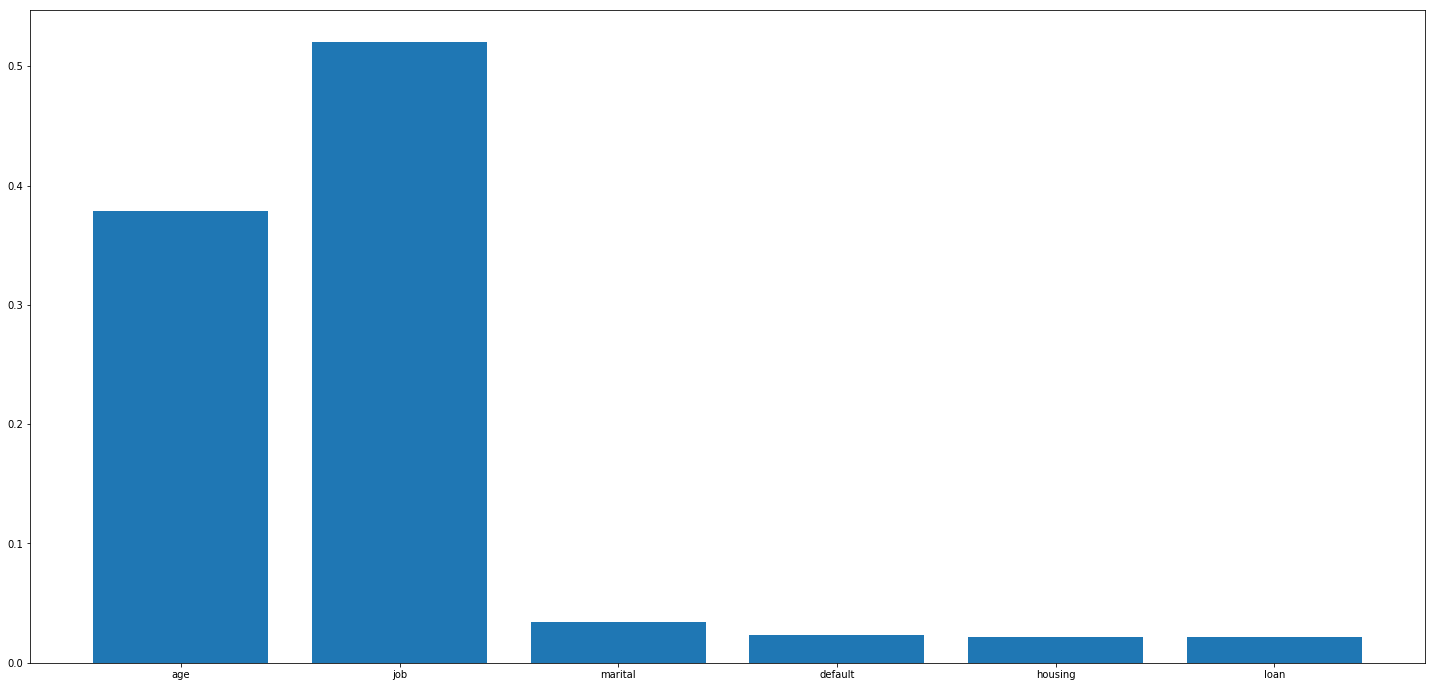

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

#Using Xtrain_d1 and ytrain_d1 
clf_d1 = RandomForestClassifier()
clf_d1.fit(Xtrain_d1, ytrain_d1)
clf_d1.feature_importances_

fig, ax = plt.subplots(figsize=(25,12))
ax.bar(Xtrain_d1.columns,clf_d1.feature_importances_)

<BarContainer object of 6 artists>

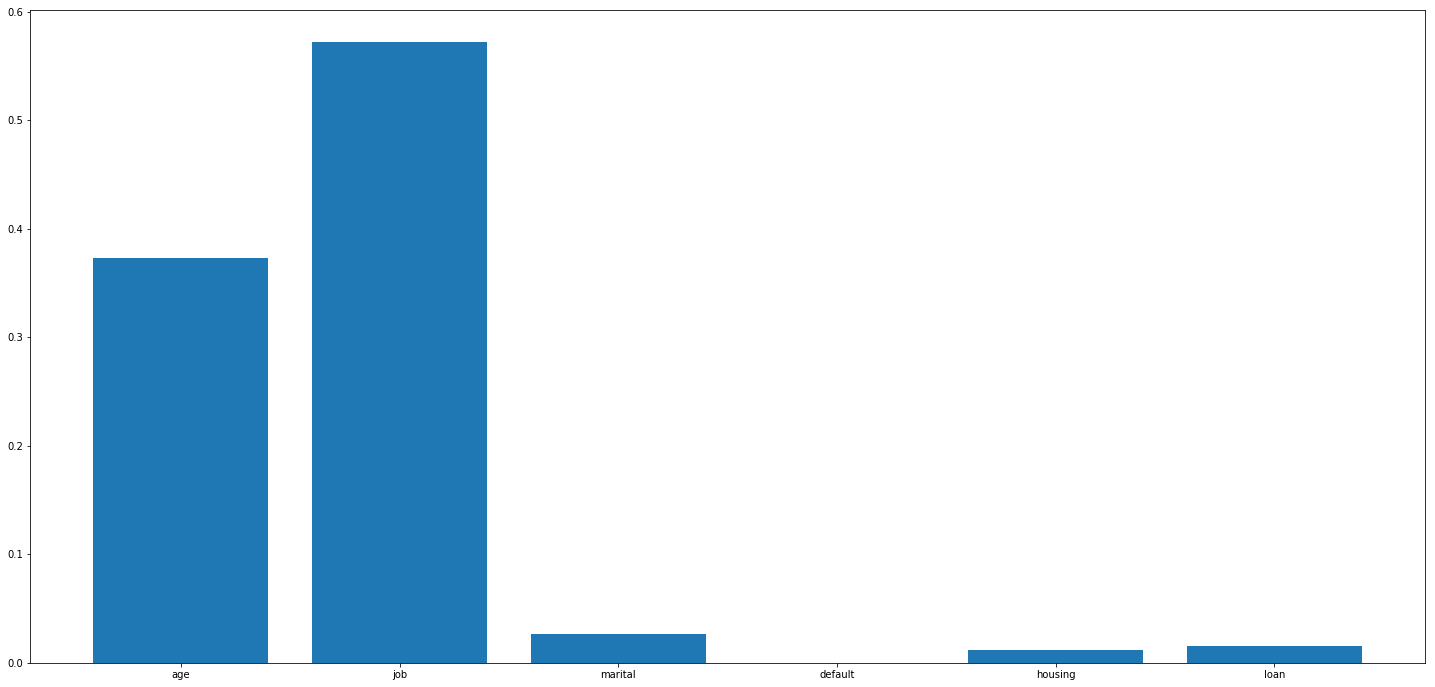

In [46]:
#Using Xtrain_d2 and ytrain_d2 
clf_d2 = RandomForestClassifier()
clf_d2.fit(Xtrain_d2, ytrain_d2)
clf_d2.feature_importances_

fig, ax = plt.subplots(figsize=(25,12))
ax.bar(Xtrain_d2.columns,clf_d2.feature_importances_)

<BarContainer object of 6 artists>

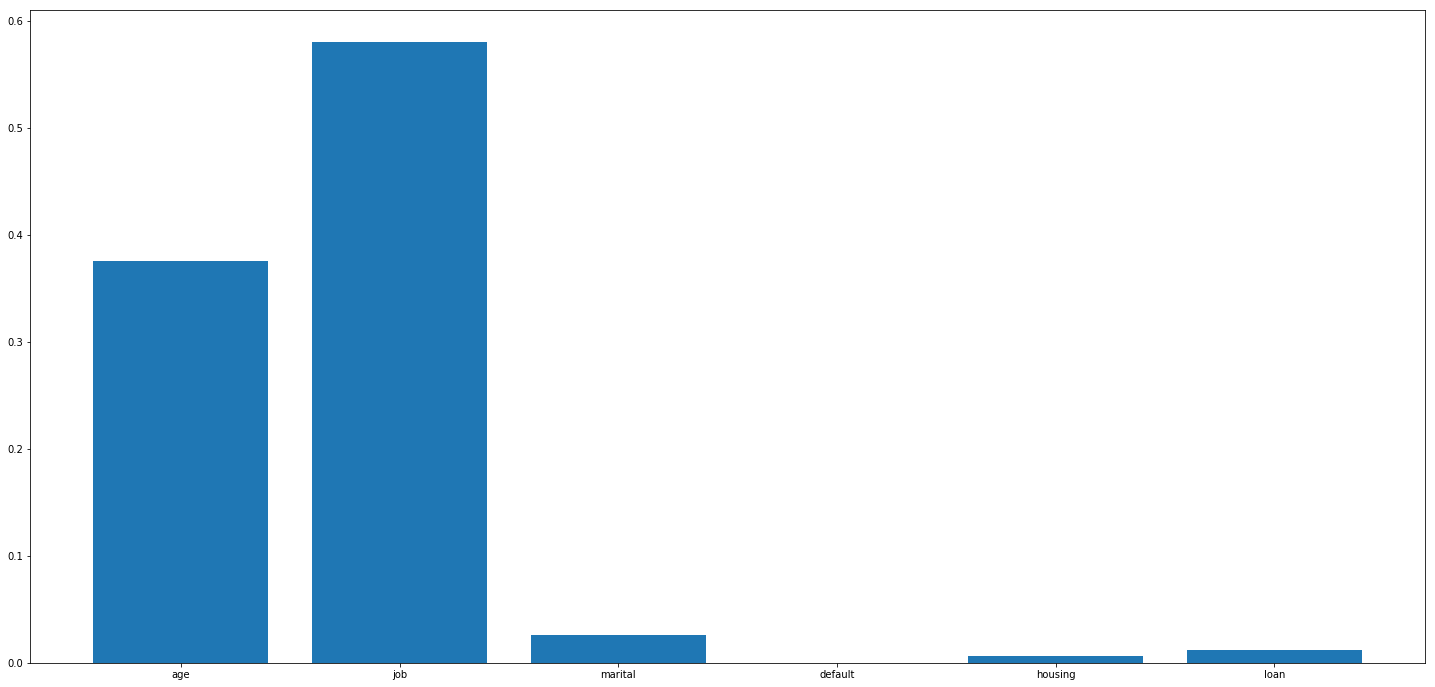

In [47]:
#Using Xtrain_d3 and ytrain_d3 
clf_d3 = RandomForestClassifier()
clf_d3.fit(Xtrain_d3, ytrain_d3)
clf_d3.feature_importances_

fig, ax = plt.subplots(figsize=(25,12))
ax.bar(Xtrain_d3.columns,clf_d3.feature_importances_)

In [48]:
pd.value_counts(bank_client_data_education.education)

6    12149
1     9495
3     6026
4     5235
0     4168
2     2291
5     1729
7       18
Name: education, dtype: int64

In [49]:
pred_education_d1 = clf_d1.predict((Xtest))
pred_education_d2 = clf_d2.predict((Xtest))
pred_education_d3 = clf_d3.predict((Xtest))


In [50]:
pred_education_d1

array([3, 3, 4, ..., 4, 4, 4], dtype=int64)

In [51]:
pred_education_d2

array([3, 3, 4, ..., 4, 4, 4], dtype=int64)

In [52]:
pred_education_d3

array([3, 3, 4, ..., 6, 4, 4], dtype=int64)

In [53]:
c=['age','job','marital']
d=['age','job','marital','loan','housing']

In [54]:
#c
Xtrain_d1_c = Xtrain_d1[c]
Xtrain_d2_c = Xtrain_d2[c]
Xtrain_d3_c = Xtrain_d3[c]

#d
Xtrain_d1_d = Xtrain_d1[d]
Xtrain_d2_d = Xtrain_d2[d]
Xtrain_d3_d = Xtrain_d3[d]


In [55]:
#c
#Using Xtrain_d1_c and ytrain_d1 
clf_d1_c = RandomForestClassifier()
clf_d1_c.fit(Xtrain_d1_c, ytrain_d1)

#Using Xtrain_d2_c and ytrain_d2 
clf_d2_c = RandomForestClassifier()
clf_d2_c.fit(Xtrain_d2_c, ytrain_d2)

#Using Xtrain_d3_c and ytrain_d3 
clf_d3_c = RandomForestClassifier()
clf_d3_c.fit(Xtrain_d3_c, ytrain_d3)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
Xtest_c = Xtest[c]
Xtest_d = Xtest[d]

In [59]:
pred_education_d1_c = clf_d1_c.predict((Xtest_c))
pred_education_d2_c = clf_d2_c.predict((Xtest_c))

In [60]:
pred_education_d1_c

array([3, 3, 4, ..., 4, 4, 0], dtype=int64)

In [61]:
#Considering
pred_education_d2_c

array([3, 3, 4, ..., 4, 4, 6], dtype=int64)

In [62]:
#d
#Using Xtrain_d1_c and ytrain_d1 
clf_d1_d = RandomForestClassifier()
clf_d1_d.fit(Xtrain_d1_d, ytrain_d1)

#Using Xtrain_d2_c and ytrain_d2 
clf_d2_d = RandomForestClassifier()
clf_d2_d.fit(Xtrain_d2_d, ytrain_d2)

#Using Xtrain_d3_c and ytrain_d3 
clf_d3_d = RandomForestClassifier()
clf_d3_d.fit(Xtrain_d3_d, ytrain_d3)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
pred_education_d1_d = clf_d1_d.predict((Xtest_d))
pred_education_d2_d = clf_d2_d.predict((Xtest_d))


In [64]:
pred_education_d1_d

array([3, 3, 4, ..., 4, 4, 0], dtype=int64)

In [65]:
#Considering
pred_education_d2_d

array([3, 3, 4, ..., 4, 6, 4], dtype=int64)

In [ ]:
#Considering final
pred_education_d2_c
pred_education_d2_d

In [66]:
#Reading bank_data_3_job.csv
d1 = pd.read_csv('C:/Trinity/Comp Sc/ML/Imputation/Marital 2/bank_data_3_marital.csv',sep=',')

In [67]:
#Reading bank_data_4_job.csv
d2 = pd.read_csv('C:/Trinity/Comp Sc/ML/Imputation/Marital 2/bank_data_4_marital.csv',sep=',')

In [68]:
bank_data_3 = d1.copy()

In [69]:
bank_data_4 = d2.copy()

In [70]:
#------------------------------------ data imputation -----------------------------------------------------
#pred_education_d2_c
bank_data_3.loc[bank_data_3.education=='unknown','education']=pred_education_d2_c

In [72]:
bank_data_3.loc[bank_data_3.education==0,'education'] = 'basic.4y'
bank_data_3.loc[bank_data_3.education==1,'education'] = 'high.school'
bank_data_3.loc[bank_data_3.education==2,'education'] = 'basic.6y'
bank_data_3.loc[bank_data_3.education==3,'education'] = 'basic.9y'
bank_data_3.loc[bank_data_3.education==4,'education'] = 'professional.course'
bank_data_3.loc[bank_data_3.education==6,'education'] = 'university.degree'
bank_data_3.loc[bank_data_3.education==7,'education'] = 'illiterate'

In [73]:
bank_data_4 = d2.copy()

In [74]:
#pred_job_d2_d
bank_data_4.loc[bank_data_4.education=='unknown','education']=pred_education_d2_d

In [75]:
bank_data_4.loc[bank_data_4.education==0,'education'] = 'basic.4y'
bank_data_4.loc[bank_data_4.education==1,'education'] = 'high.school'
bank_data_4.loc[bank_data_4.education==2,'education'] = 'basic.6y'
bank_data_4.loc[bank_data_4.education==3,'education'] = 'basic.9y'
bank_data_4.loc[bank_data_4.education==4,'education'] = 'professional.course'
bank_data_4.loc[bank_data_4.education==6,'education'] = 'university.degree'
bank_data_4.loc[bank_data_4.education==7,'education'] = 'illiterate'

In [ ]:
bank_data_.to_csv('bank_data_4_marital.csv')

In [ ]:
bank_data_4.to_csv('bank_data_4_marital.csv')